<a href="https://colab.research.google.com/github/kamg2218/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import requests
import json

api_key = "556d4371416b616d36365368525557"
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/1000"

start_year, start_month = 2015, 1
end_year, end_month = 2024, 12

def month_iter(y1, m1, y2, m2):
    y, m = y1, m1
    while (y < y2) or (y == y2 and m <= m2):
        yield str(y), str(m).zfill(2)
        m += 1
        if m == 13:
            y += 1
            m = 1

months = [(y,m) for y, m in month_iter(start_year, start_month, end_year, end_month)]

get_specific_data = lambda row : {'YEAR': row['YEAR'], 'MON': row['MON'], 'EUS': row['EUS'], 'GUS': row['GUS'], 'WUS':row['WUS'], 'HUS': row['HUS']}

arranged_rows = []
for y, m in months:
    url = f"{base_url}/{y}/{m}"
    response = requests.get(url)

    if response.status_code == 200:
        result = response.json()
        rows = result['energyUseDataSummaryInfo']['row']
        personal_rows = list(filter(lambda x: x['MM_TYPE'] == '개인', rows))
        arranged_row = list(map(get_specific_data, personal_rows))
        arranged_rows.extend(arranged_row)
    else:
        print(f"api 호출 실패 : {response.status_code}")

print(arranged_rows)

with open('result.txt', 'w') as file:
    file.write(json.dumps(arranged_rows))



[{'YEAR': '2015', 'MON': '01', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}, {'YEAR': '2015', 'MON': '02', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}, {'YEAR': '2015', 'MON': '03', 'EUS': '175215719', 'GUS': '49984873', 'WUS': '12655474.249', 'HUS': '13826348.508'}, {'YEAR': '2015', 'MON': '04', 'EUS': '183891769', 'GUS': '37306841', 'WUS': '12954773.246', 'HUS': '5836002.885'}, {'YEAR': '2015', 'MON': '05', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}, {'YEAR': '2015', 'MON': '06', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}, {'YEAR': '2015', 'MON': '07', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}, {'YEAR': '2015', 'MON': '08', 'EUS': '242000479', 'GUS': '7619018', 'WUS': '15164553.742', 'HUS': '460288.965'}, {'YEAR': '2015', 'MON': '09', 'EUS': '207540868', 'GUS': '6518422', 'WUS': '14419

In [ ]:
import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

df = df[["YEAR", "MON", "EUS", "GUS", "WUS", "HUS"]]

print(df)

     YEAR MON        EUS         GUS           WUS           HUS
0    2015  01  193784708  59133720.0  1.281976e+07  2.274084e+07
1    2015  02  189974230  56487358.0  1.265689e+07  1.879332e+07
2    2015  03  175215719  49984873.0  1.265547e+07  1.382635e+07
3    2015  04  183891769  37306841.0  1.295477e+07  5.836003e+06
4    2015  05  177289769  22060892.0  1.308673e+07  1.320896e+06
..    ...  ..        ...         ...           ...           ...
115  2024  08  463971328   7072251.0  1.587354e+07  1.300823e+05
116  2024  09  409872908   5729131.0  1.514332e+07  3.420507e+06
117  2024  10  282268119   8233421.0  1.529767e+07  2.695491e+06
118  2024  11  257927956  17418221.0  1.467867e+07  8.836296e+06
119  2024  12  134828126  42103424.0  7.326854e+06  1.513199e+06

[120 rows x 6 columns]


In [2]:
import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["SEASON"] = df["MON"].astype(int).apply(get_season)

df = df[["YEAR", "MON", "SEASON", "EUS", "GUS", "WUS", "HUS"]]
print(df)

     YEAR MON SEASON        EUS         GUS           WUS           HUS
0    2015  01     겨울  193784708  59133720.0  1.281976e+07  2.274084e+07
1    2015  02     겨울  189974230  56487358.0  1.265689e+07  1.879332e+07
2    2015  03      봄  175215719  49984873.0  1.265547e+07  1.382635e+07
3    2015  04      봄  183891769  37306841.0  1.295477e+07  5.836003e+06
4    2015  05      봄  177289769  22060892.0  1.308673e+07  1.320896e+06
..    ...  ..    ...        ...         ...           ...           ...
115  2024  08     여름  463971328   7072251.0  1.587354e+07  1.300823e+05
116  2024  09     가을  409872908   5729131.0  1.514332e+07  3.420507e+06
117  2024  10     가을  282268119   8233421.0  1.529767e+07  2.695491e+06
118  2024  11     가을  257927956  17418221.0  1.467867e+07  8.836296e+06
119  2024  12     겨울  134828126  42103424.0  7.326854e+06  1.513199e+06

[120 rows x 7 columns]


In [6]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


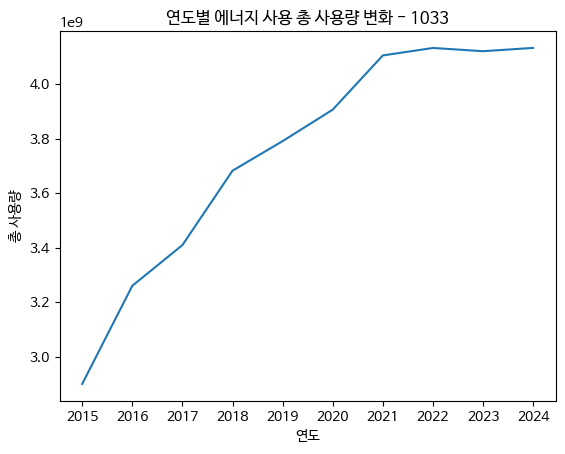

In [69]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["SEASON"] = df["MON"].astype(int).apply(get_season)
df = df[["YEAR", "MON", "SEASON", "EUS", "GUS", "WUS", "HUS"]]


fig, ax = plt.subplots()

x = df["YEAR"].unique()

df["TOTAL"] = df[["EUS", "GUS", "WUS", "HUS"]].sum(axis=1)
y = df.groupby("YEAR")[["TOTAL"]].sum()

ax.plot(x, y)
ax.set_title("연도별 에너지 사용 총 사용량 변화 - 1033")
ax.set_xlabel("연도")
ax.set_ylabel("총 사용량")
plt.show()

SEASON
가을    1.501570e+07
겨울    6.657663e+07
봄     4.443600e+07
여름    1.127243e+07
Name: GUS, dtype: float64


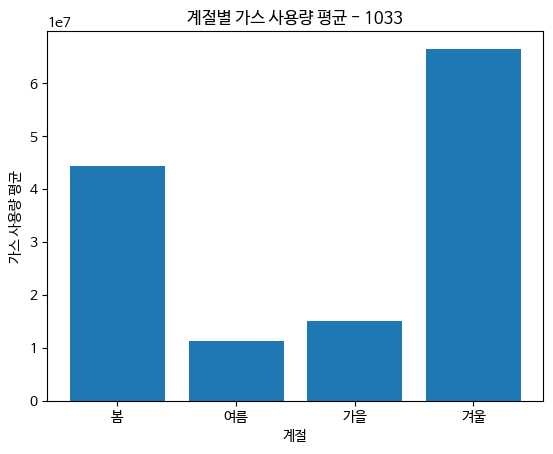

In [59]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
df = pd.DataFrame(arranged_rows)

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col])

def get_season(m):
    if m >= 3 and m <= 5: return "봄"
    elif m >= 6 and m <= 8: return "여름"
    elif m >= 9 and m <= 11: return "가을"
    else: return "겨울"

df["SEASON"] = df["MON"].astype(int).apply(get_season)
df = df[["YEAR", "MON", "SEASON", "EUS", "GUS", "WUS", "HUS"]]

fig, ax = plt.subplots()

x = ["봄", "여름", "가을", "겨울"]

season_mean = df.groupby("SEASON")["GUS"].mean()
print(season_mean)
y = season_mean.reindex(x).values

ax.bar(x, y)

ax.set_title("계절별 가스 사용량 평균 - 1033")
ax.set_xlabel("계절")
ax.set_ylabel("가스 사용량 평균")
plt.show()